# load data

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) #Mount colab to my google drive

import os
os.chdir("/content/drive/MyDrive/ECE219_2022W")
os.listdir()

%cd /content/drive/MyDrive
%cd ECE219_2022W

Mounted at /content/drive
/content/drive/MyDrive
/content/drive/MyDrive/ECE219_2022W


In [3]:
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)
import random
random.seed(42)
import pandas as pd

# Question1

## Overview: rows and columns presented in dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import nltk

In [5]:
# Read the data into a dataframe
df = pd.read_csv("Project_1_dataset_01_01_2022.csv")
df.shape
print("The number of rows(samples) is %s.\nThe number of columns(features) is %s." 
      % (df.shape[0],df.shape[1]))

The number of rows(samples) is 2072.
The number of columns(features) is 9.


## Histograms

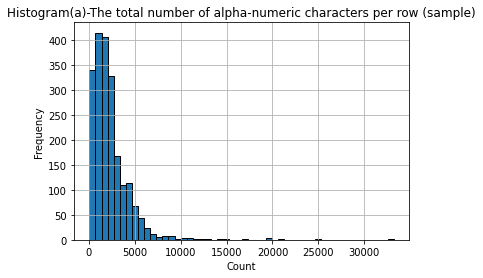

In [9]:
# Histogram (a)
def countfunc(string):
    alpha_count = sum(map(str.isalpha, string))
    numeric_count = sum(map(str.isnumeric, string))
    alpha_numeric_count = alpha_count + numeric_count
    alpha_numeric_count
    return alpha_numeric_count 

df['alpha_numeric_count'] = df.full_text.map(countfunc)

plt.hist(df.alpha_numeric_count, bins = 50, edgecolor = "black")
plt.title("Histogram(a)-The total number of alpha-numeric characters per row (sample)")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.grid(True)

Text(0, 0.5, 'Number of samples')

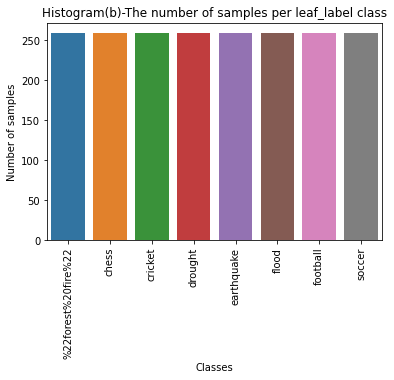

In [10]:
# Histogram(b)
dfgb_leaf_label = df.groupby('leaf_label').size()
sns.barplot(x = dfgb_leaf_label.index, y = dfgb_leaf_label.values, orient = "v")
plt.xticks(rotation=90)

plt.title("Histogram(b)-The number of samples per leaf_label class")
plt.xlabel("Classes")
plt.ylabel("Number of samples")

Text(0, 0.5, 'The number of samples')

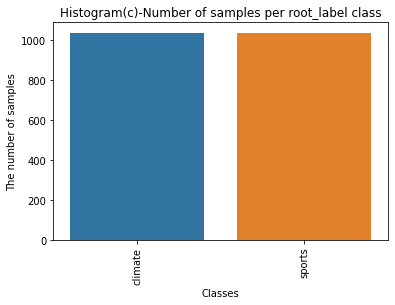

In [11]:
## Histogram (c)
dfgb_root_label = df.groupby('root_label').size() 
sns.barplot(x = dfgb_root_label.index, y = dfgb_root_label.values)
plt.xticks(rotation=90)

plt.title("Histogram(c)-Number of samples per root_label class")
plt.xlabel("Classes")
plt.ylabel("The number of samples")

## Interpret plots

- Histogram(a): The total number of alpha-numeric characters per row (sample) is mostly between 0 to 5000
- Histogram(b): For the set of leaf_label, the number of samples are evenly distributed.
- Histogram(c): For the set of root_label, the number of samples are evenly distributed.

# Question 2: Report the number of training and testing samples.

In [12]:

import numpy as np
import random

np.random.seed(42)
random.seed(42)

# spliting dataset into training and testing data 

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df[["full_text", "leaf_label", "root_label"]], test_size=0.2)

print("The number of training samples is %s.\nThe number of testing samples is %s." 
      % (train_set.shape[0], test_set.shape[0]))

The number of training samples is 1657.
The number of testing samples is 415.


# Question3: extract features from the textual data

In [13]:
import re
def clean(text):
        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        texter = re.sub(r"<br />", " ", text)
        texter = re.sub(r"&quot;", "\"",texter)
        texter = re.sub('&#39;', "\"", texter)
        texter = re.sub('\n', " ", texter)
        texter = re.sub(' u '," you ", texter)
        texter = re.sub('`',"", texter)
        texter = re.sub(' +', ' ', texter)
        texter = re.sub(r"(!)\1+", r"!", texter)
        texter = re.sub(r"(\?)\1+", r"?", texter)
        texter = re.sub('&amp;', 'and', texter)
        texter = re.sub('\r', ' ',texter)
        clean = re.compile('<.*?>')
        texter = texter.encode('ascii', 'ignore').decode('ascii')
        texter = re.sub(r'(?:[a-zA-Z]*[0-9]+[a-zA-Z]+)|(?:[a-zA-Z]+[0-9]+[a-zA-Z]*)',"",texter)
        texter = re.sub(clean, '', texter)
        if texter == "":
            texter = ""
        return texter

In [14]:
# clean the dataset
train_set['full_text_clean'] =  train_set['full_text'].apply(lambda x: clean(x))
test_set['full_text_clean'] =  test_set['full_text'].apply(lambda x: clean(x))

In [15]:
# creating the combined_stopwords
nltk.download('stopwords')
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
stop_words_en = stopwords.words('english')
from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
from nltk import pos_tag
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(list_word): 
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
cv = CountVectorizer(min_df=3, analyzer=stem_rmv_punc)
X_train_counts = cv.fit_transform(train_set['full_text_clean'])
print(X_train_counts.shape)
X_test_counts = cv.transform(test_set['full_text_clean'])
print(X_test_counts.shape)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
(1657, 9800)
(415, 9800)


In [19]:
# compute the TFIDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer() 
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(1657, 9800)
(415, 9800)


# Question 4: Reduce the dimensionality of the data

## LSI

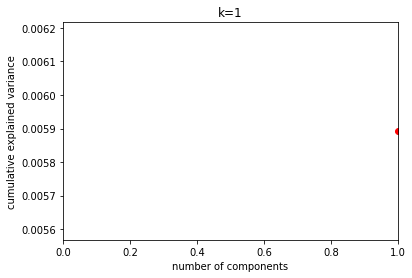

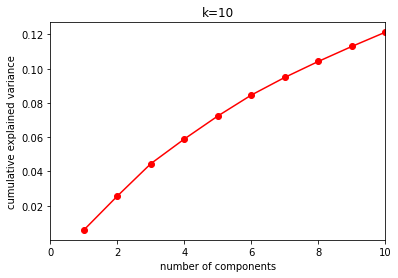

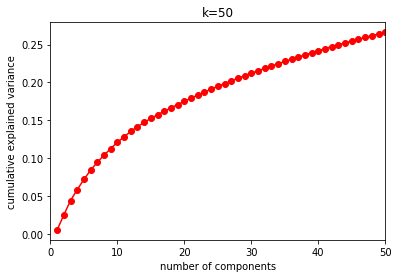

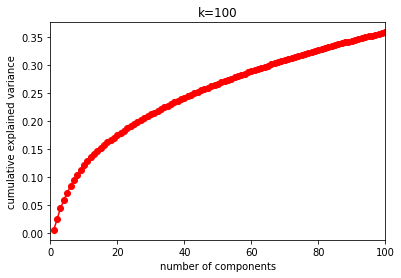

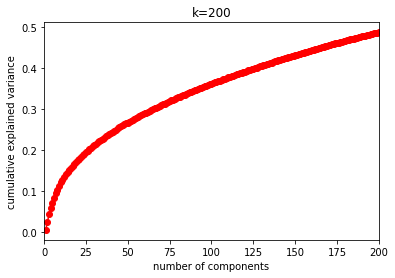

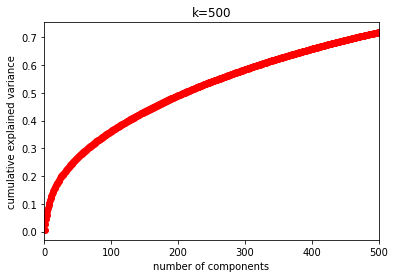

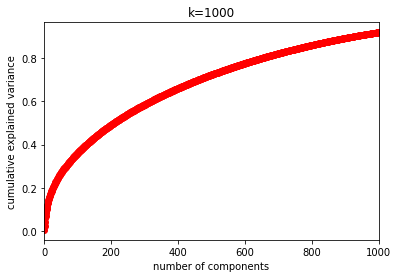

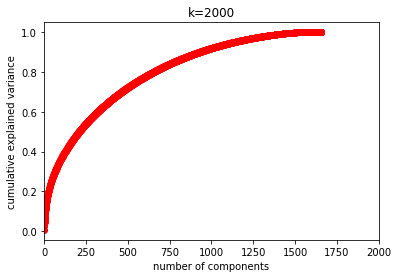

In [20]:
from sklearn.decomposition import TruncatedSVD

def explained_variance_ratio_plot(n_components):
    ''' plot explained_variance_ratio_'''
    svd = TruncatedSVD(n_components = n_components,random_state = 42)
    X_train_lsa = svd.fit_transform(X_train_tfidf)
    X_test_lsa = svd.transform(X_test_tfidf)
    X_train_lsa.shape  # 1657*n
    X_test_lsa.shape   # 415*n    
    evr = svd.explained_variance_ratio_
    plt.plot(np.arange(len(evr))+1,evr.cumsum(),c="red",marker='o')
    plt.xlim([0, n_components])
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    plt.title("%s%s" % ('k=', n_components))
    plt.show()


k = [1, 10, 50, 100, 200, 500, 1000, 2000]

for i in k:
    explained_variance_ratio_plot(i)

In [21]:
# choose k=50, the following sections use it
svd = TruncatedSVD(n_components=50,random_state = 42)
X_train_lsa = svd.fit_transform(X_train_tfidf)  #  U * Sigma: dimension-reduced data matrix
X_test_lsa = svd.transform(X_test_tfidf)
print(X_train_lsa.shape)
print(X_test_lsa.shape)
evr = svd.explained_variance_ratio_
VT = svd.components_  # V transpose 
Sigma_matrix = np.diag(svd.singular_values_)

MSE_LSI = (np.linalg.norm(X_train_tfidf - X_train_lsa @ VT))**2
print("The MSE for LSI is: ",MSE_LSI)
# X_train_lsa

(1657, 50)
(415, 50)
The MSE for LSI is:  1176.7411328952458


## NMF

In [22]:
from sklearn import decomposition

NMF = decomposition.NMF(n_components=50, random_state=42)
W_train = NMF.fit_transform(X_train_tfidf)  # 1657*50
print(type(W_train))
print(W_train.shape)
W_test = NMF.transform(X_test_tfidf)  # 415*50
print(type(W_test))
print(W_test.shape)
H = NMF.components_ # 50*9800
print(type(H))
print(H.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


<class 'numpy.ndarray'>
(1657, 50)
<class 'numpy.ndarray'>
(415, 50)
<class 'numpy.ndarray'>
(50, 9800)


In [23]:
MSE_NMF = (np.linalg.norm(X_train_tfidf - W_train @ H))**2
print("The MSE for NMF is: ", MSE_NMF)

The MSE for NMF is:  1197.1455335089233


# Question 5: Compare and contrast hard-margin and soft-margin linear SVMs

In [24]:
Y_train = pd.get_dummies(train_set.root_label)  
Y_train = Y_train.iloc[:,1].values 
Y_train_names = train_set["root_label"].unique()  

Y_test = pd.get_dummies(test_set.root_label)  
Y_test = Y_test.iloc[:,1].values 
Y_test_names = train_set["root_label"].unique()

In [25]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")


def Display_SVM(C):
    '''Report the confusion matrix;
       Calculate the accuracy, recall, precision and F-1 score;
       Plot the ROC curve of SVM on the testing set'''
    
    clf_svm = SVC(C=C, kernel='linear',random_state=42, ) 
    clf_svm.fit(X_train_lsa, Y_train)
    
    # Report Confusion Matrix
    disp = plot_confusion_matrix(clf_svm, 
                          X_test_lsa,
                          Y_test,
                          values_format='d',
                          display_labels= Y_train_names)

    disp.ax_.set_title('Confusion Matrix With C= {}'.format(C))
    print('The confusion matrix with C={} is:\n'.format(C), disp.confusion_matrix)

    # Calcute accuracy, recall, precision, F-1 score
    y_pred = clf_svm.predict(X_test_lsa)
    print('The accuracy with C= {} is: '.format(C), accuracy_score(Y_test,y_pred))
    print('The recall with C= {} is: '.format(C), recall_score(Y_test,y_pred))
    print('The percision with C= {} is: ' .format(C), precision_score(Y_test,y_pred))
    print('The F-1 score with C= {} is: ' .format(C), f1_score(Y_test,y_pred))

    # Plot ROC curve
    plot_roc_curve(clf_svm, X_test_lsa, Y_test) 
    plt.title('Receiver Operating Characteristic (C ={})'.format(C))

The confusion matrix with C=1000 is:
 [[199   7]
 [  3 206]]
The accuracy with C= 1000 is:  0.9759036144578314
The recall with C= 1000 is:  0.9856459330143541
The percision with C= 1000 is:  0.9671361502347418
The F-1 score with C= 1000 is:  0.976303317535545
The confusion matrix with C=0.0001 is:
 [[206   0]
 [209   0]]
The accuracy with C= 0.0001 is:  0.4963855421686747
The recall with C= 0.0001 is:  0.0
The percision with C= 0.0001 is:  0.0
The F-1 score with C= 0.0001 is:  0.0
The confusion matrix with C=100000 is:
 [[199   7]
 [  3 206]]
The accuracy with C= 100000 is:  0.9759036144578314
The recall with C= 100000 is:  0.9856459330143541
The percision with C= 100000 is:  0.9671361502347418
The F-1 score with C= 100000 is:  0.976303317535545


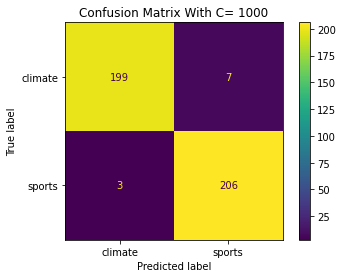

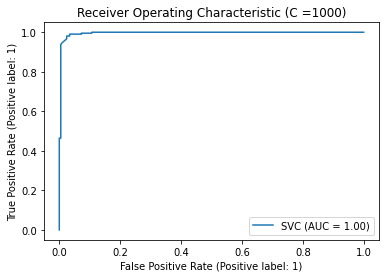

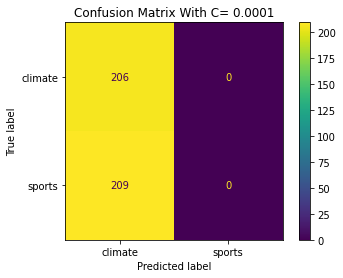

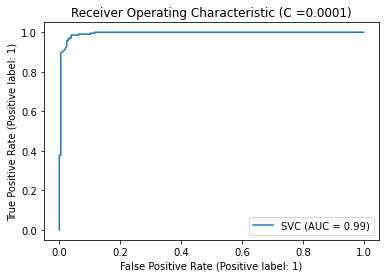

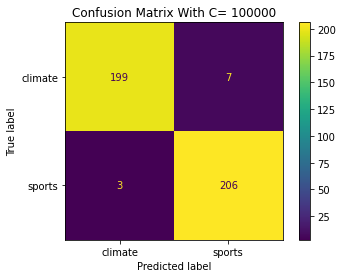

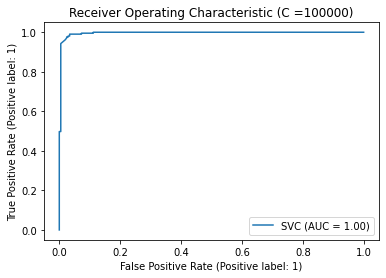

In [26]:
Display_SVM(1000) # hard Margin C= 1000
Display_SVM(0.0001) # soft Margin C= 0.0001
Display_SVM(100000)# 2nd Hard Margin, C=100000 

## Cross validation

In [27]:
from sklearn.model_selection import GridSearchCV

x = range(-3, 7, 1)
C = []
for i in x:
    C.append(10 ** i)   #[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

param_grid = [
    {'C': C, 
     'kernel':['linear']
    },
]
optimal_params = GridSearchCV(SVC(),param_grid,cv=5) # cv: number of folds of corss validation                             
    
optimal_params.fit(X_train_lsa, Y_train)
print(optimal_params.best_params_)

{'C': 1000, 'kernel': 'linear'}


In [28]:
results = pd.DataFrame(optimal_params.cv_results_)
results[["param_C",'mean_test_score',"std_test_score",'rank_test_score']]

,param_C,mean_test_score,std_test_score,rank_test_score
0,0.001,0.500906,0.000740,9
1,0.01,0.500906,0.000740,9
2,0.1,0.943270,0.011997,8
3,1,0.943869,0.010921,7
4,10,0.955940,0.008676,3
5,100,0.957147,0.008859,2
6,1000,0.957746,0.007443,1
7,10000,0.954126,0.008233,6
8,100000,0.954728,0.008998,4
9,1000000,0.954728,0.008998,4


The confusion matrix with C=1000 is:
 [[199   7]
 [  3 206]]
The accuracy with C= 1000 is:  0.9759036144578314
The recall with C= 1000 is:  0.9856459330143541
The percision with C= 1000 is:  0.9671361502347418
The F-1 score with C= 1000 is:  0.976303317535545


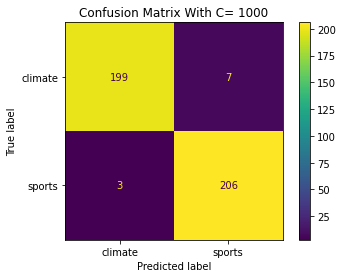

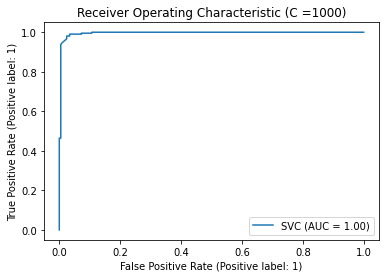

In [29]:
Best_C = optimal_params.best_params_["C"]
Display_SVM(Best_C)

# Question 6: Evaluate a logistic classifier

The confusion matrix with C = 1, penalty = none is:
 [[200   6]
 [  3 206]]
The accuracy with C = 1, penalty = none is:  0.9783132530120482
The recall with C = 1, penalty = none is:  0.9856459330143541
The percision with C = 1, penalty = none is:  0.9716981132075472
The F-1 score with C = 1, penalty = none is:  0.9786223277909739
The average length of the learnt coeff is 9.119370529074505


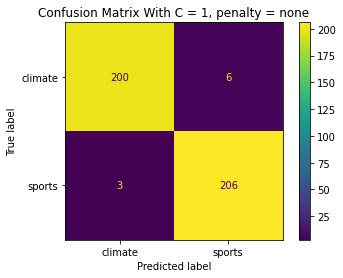

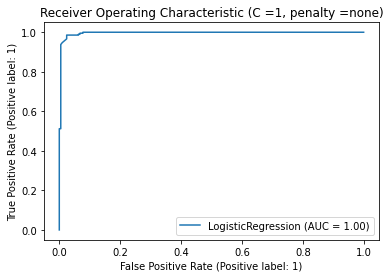

In [30]:
from sklearn.linear_model import LogisticRegression

def Display_LR(penalty='none', C=1, solver='saga'):
    '''Report the confusion matrix;
       Calculate the accuracy, recall, precision and F-1 score;
       Plot the ROC curve of LR on the testing set'''
    clf_lr = LogisticRegression(penalty=penalty, solver=solver, C=C, random_state=42)
    clf_lr.fit(X_train_lsa, Y_train)
    
    # Report Confusion Matrix
    disp = plot_confusion_matrix(clf_lr, 
                          X_test_lsa,
                          Y_test,
                          values_format='d',
                          display_labels= Y_train_names)

    disp.ax_.set_title('Confusion Matrix With C = {}, penalty = {}'.format(C, penalty))
    print('The confusion matrix with C = {}, penalty = {} is:\n'.format(C, penalty), disp.confusion_matrix)

    # Calcute accuracy, recall, precision, F-1 score
    y_pred = clf_lr.predict(X_test_lsa)
    print('The accuracy with C = {}, penalty = {} is: '.format(C, penalty), accuracy_score(Y_test,y_pred))
    print('The recall with C = {}, penalty = {} is: '.format(C, penalty), recall_score(Y_test,y_pred))
    print('The percision with C = {}, penalty = {} is: ' .format(C, penalty), precision_score(Y_test,y_pred))
    print('The F-1 score with C = {}, penalty = {} is: ' .format(C, penalty), f1_score(Y_test,y_pred))

    # Calcute learnt coeff
    coeff = np.append(clf_lr.coef_, clf_lr.intercept_.reshape((1,1)), axis=1)
    print(f"The average length of the learnt coeff is {np.abs(coeff).mean()}")

    # Plot ROC curve
    plot_roc_curve(clf_lr, X_test_lsa, Y_test) 
    plt.title('Receiver Operating Characteristic (C ={}, penalty ={})'.format(C, penalty))

    

Display_LR('none', 1)

In [31]:
from sklearn.model_selection import GridSearchCV

Cs = [10**i for i in range(-4, 5)]

for penalty in ['l1', 'l2']:
  param_grid = [
      {'penalty':[penalty],
       'C': Cs, 
       'solver':['saga']}
  ]
  optimal_params = GridSearchCV(LogisticRegression(), param_grid, cv=5) # cv: number of folds of corss validation                             
  optimal_params.fit(X_train_lsa, Y_train)
  print(optimal_params.best_params_)

{'C': 100, 'penalty': 'l1', 'solver': 'saga'}
{'C': 10000, 'penalty': 'l2', 'solver': 'saga'}


The confusion matrix with C = 100, penalty = l1 is:
 [[200   6]
 [  3 206]]
The accuracy with C = 100, penalty = l1 is:  0.9783132530120482
The recall with C = 100, penalty = l1 is:  0.9856459330143541
The percision with C = 100, penalty = l1 is:  0.9716981132075472
The F-1 score with C = 100, penalty = l1 is:  0.9786223277909739
The average length of the learnt coeff is 8.719316733220316
The confusion matrix with C = 1000, penalty = l2 is:
 [[200   6]
 [  3 206]]
The accuracy with C = 1000, penalty = l2 is:  0.9783132530120482
The recall with C = 1000, penalty = l2 is:  0.9856459330143541
The percision with C = 1000, penalty = l2 is:  0.9716981132075472
The F-1 score with C = 1000, penalty = l2 is:  0.9786223277909739
The average length of the learnt coeff is 8.704202625042262


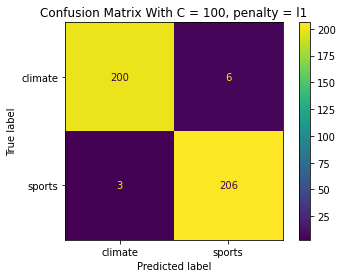

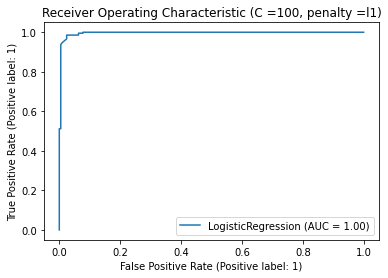

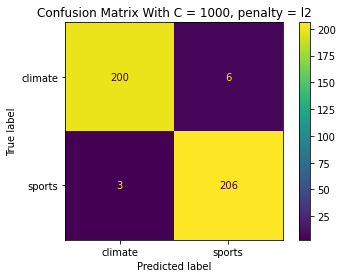

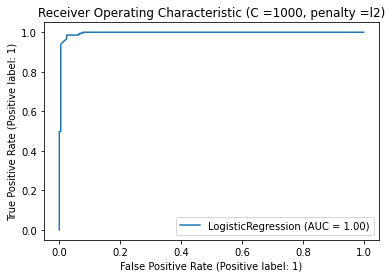

In [32]:
Display_LR(penalty='l1', C=100, solver='saga')
Display_LR(penalty='l2', C=1000, solver='saga')

# Question 7: Evaluate and profile a Naive Bayes classifier

The confusion matrix is:
 [[200   6]
 [  8 201]]
The accuracy is: 0.9662650602409638
The recall is: 0.9617224880382775
The percision is: 0.9710144927536232
The F-1 score is: 0.9663461538461539


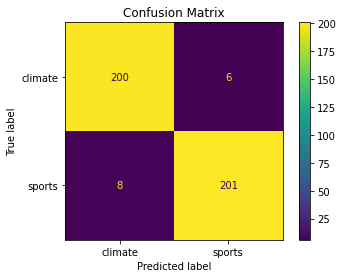

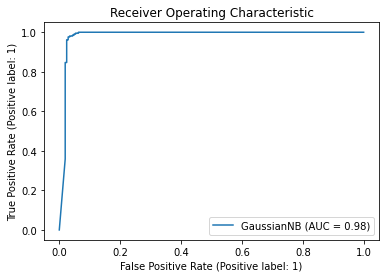

In [33]:
from sklearn.naive_bayes import GaussianNB

def Display_GNB():
    '''Report the confusion matrix;
       Calculate the accuracy, recall, precision and F-1 score;
       Plot the ROC curve of GaussianNB on the testing set'''
    clf_gnb = GaussianNB()
    clf_gnb.fit(X_train_lsa, Y_train)
    
    # Report Confusion Matrix
    disp = plot_confusion_matrix(clf_gnb, 
                          X_test_lsa,
                          Y_test,
                          values_format='d',
                          display_labels= Y_train_names)

    disp.ax_.set_title('Confusion Matrix')
    print('The confusion matrix is:\n', disp.confusion_matrix)

    # Calcute accuracy, recall, precision, F-1 score
    y_pred = clf_gnb.predict(X_test_lsa)
    print('The accuracy is:', accuracy_score(Y_test,y_pred))
    print('The recall is:', recall_score(Y_test,y_pred))
    print('The percision is:', precision_score(Y_test,y_pred))
    print('The F-1 score is:', f1_score(Y_test,y_pred))

    # Plot ROC curve
    plot_roc_curve(clf_gnb, X_test_lsa, Y_test) 
    plt.title('Receiver Operating Characteristic')
    
Display_GNB()

# Question 8: Grid Search of Parameters

In [54]:
from nltk.stem import PorterStemmer
from tempfile import mkdtemp
from joblib import Memory
from sklearn.pipeline import Pipeline

stemmer = PorterStemmer()
def stem_sent(list_word):
    return [stemmer.stem(word.lower()) for word in list_word]

def stem_rmv_punc_2(doc):
    # stemming
    return (word for word in stem_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())
def stem_rmv_punc_3(doc):
    # do nothing
    return (word for word in analyzer(doc))


cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=0)



datas = [train_set['full_text_clean'], train_set['full_text']]
min_dfs = [3, 5]
analyzers = [stem_rmv_punc, stem_rmv_punc_2, stem_rmv_punc_3]
reductions = [TruncatedSVD(random_state=42), decomposition.NMF(random_state=42)]
ks = [5, 50, 500]
classifiers = [SVC(C=1000, kernel='linear',random_state=42), 
               LogisticRegression(penalty='l2', solver='saga', C=1000),
               GaussianNB()]

pipeline = Pipeline(steps = [
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=50, random_state = 42)),
    ('classifier', SVC(C=100, kernel='linear',random_state=42) )
], memory = memory)

grid_params = {
    'cv__min_df': min_dfs,
    'cv__analyzer': analyzers,
    'svd': reductions,
    'svd__n_components': ks,
    'classifier': classifiers
}

# # Instantiate new gridsearch object
clean_model = GridSearchCV(pipeline, grid_params, cv=5, verbose=4, n_jobs=1, error_score=0)
clean_model.fit(train_set['full_text_clean'], Y_train)
print(clean_model.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END classifier=SVC(C=1000, kernel='linear', random_state=42), cv__analyzer=<function stem_rmv_punc at 0x7f40e6dd7830>, cv__min_df=3, svd=TruncatedSVD(random_state=42), svd__n_components=5;, score=0.937 total time=  45.6s
[CV 2/5] END classifier=SVC(C=1000, kernel='linear', random_state=42), cv__analyzer=<function stem_rmv_punc at 0x7f40e6dd7830>, cv__min_df=3, svd=TruncatedSVD(random_state=42), svd__n_components=5;, score=0.913 total time=  45.1s
[CV 3/5] END classifier=SVC(C=1000, kernel='linear', random_state=42), cv__analyzer=<function stem_rmv_punc at 0x7f40e6dd7830>, cv__min_df=3, svd=TruncatedSVD(random_state=42), svd__n_components=5;, score=0.909 total time=  47.7s
[CV 4/5] END classifier=SVC(C=1000, kernel='linear', random_state=42), cv__analyzer=<function stem_rmv_punc at 0x7f40e6dd7830>, cv__min_df=3, svd=TruncatedSVD(random_state=42), svd__n_components=5;, score=0.937 total time=  44.3s
[CV 5/5] END clas

KeyboardInterrupt: ignored

In [ ]:
result = pd.DataFrame(clean_model.cv_results_)
result[["param_classifier", "param_cv__analyzer","param_cv__min_df", "param_svd", "param_svd__n_components", "mean_test_score"]].sort_values(by = ['mean_test_score'], ascending = False).head()

In [ ]:
no_clean_model = GridSearchCV(pipeline, grid_params, cv=5, verbose=4, n_jobs=1, error_score=0)
no_clean_model.fit(train_set['full_text'], Y_train)
print(no_clean_model.best_score_)

In [ ]:
result = pd.DataFrame(no_clean_model.cv_results_)
result[["param_classifier", "param_cv__analyzer","param_cv__min_df", "param_svd", "param_svd__n_components", "mean_test_score"]].sort_values(by = ['mean_test_score'], ascending = False).head()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {
    'cv__min_df': min_dfs,
    'cv__analyzer': analyzers,
    'svd': [TruncatedSVD(random_state=42)],
    'svd__n_components': [500],
    'classifier': classifiers
}

# # Instantiate new gridsearch object
clean_model = RandomizedSearchCV(pipeline, grid_params, cv=5, verbose=4, n_jobs=1, error_score=0)
clean_model.fit(train_set['full_text_clean'], Y_train)
print(clean_model.best_score_)
result = pd.DataFrame(clean_model.cv_results_)
result[["param_classifier", "param_cv__analyzer","param_cv__min_df", "param_svd", "param_svd__n_components", "mean_test_score"]].sort_values(by = ['mean_test_score'], ascending = False).head()

In [ ]:
grid_params = {
    'cv__min_df': min_dfs,
    'cv__analyzer': analyzers,
    'svd': [TruncatedSVD(random_state=42)],
    'svd__n_components': [500],
    'classifier': classifiers
}

# # Instantiate new gridsearch object
clean_model = RandomizedSearchCV(pipeline, grid_params, cv=5, verbose=4, n_jobs=1, error_score=0)
clean_model.fit(train_set['full_text_clean'], Y_train)
print(clean_model.best_score_)
result = pd.DataFrame(clean_model.cv_results_)
result[["param_classifier", "param_cv__analyzer","param_cv__min_df", "param_svd", "param_svd__n_components", "mean_test_score"]].sort_values(by = ['mean_test_score'], ascending = False).head()

In [55]:
# best 5 model test score
pipeline1 = Pipeline(steps = [
    ('cv', CountVectorizer(min_df=3, analyzer=stem_rmv_punc_2)),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=500, random_state = 42)),
    ('classifier', SVC(C=100, kernel='linear',random_state=42) )
], memory = memory)

pipeline2 = Pipeline(steps = [
    ('cv', CountVectorizer(min_df=3, analyzer=stem_rmv_punc_2)),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=500, random_state = 42)),
    ('classifier', LogisticRegression(penalty='l2', solver='saga', C=1000))
], memory = memory)

pipeline3 = Pipeline(steps = [
    ('cv', CountVectorizer(min_df=5, analyzer=stem_rmv_punc_2)),
    ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=50, random_state = 42)),
    ('classifier', GaussianNB())
], memory = memory)

pipeline1.fit(train_set['full_text_clean'], Y_train)
print(pipeline1.score(test_set['full_text_clean'], Y_test))

pipeline1.fit(train_set['full_text'], Y_train)
print(pipeline1.score(test_set['full_text'], Y_test))

pipeline2.fit(train_set['full_text_clean'], Y_train)
print(pipeline2.score(test_set['full_text_clean'], Y_test))

pipeline2.fit(train_set['full_text'], Y_train)
print(pipeline2.score(test_set['full_text'], Y_test))

pipeline3.fit(train_set['full_text'], Y_train)
print(pipeline3.score(test_set['full_text'], Y_test))

0.980722891566265
0.980722891566265
0.983132530120482
0.983132530120482
0.963855421686747


# Question 9: Multiclass Classification

In [34]:
map_row_to_class = {0:"chess", 1:"cricket", 2:"soccer", 3:"football", 
                4:"%22forest%20fire%22", 5:"flood", 6:"earthquake", 7:"drought"}
map_class_to_row = {"chess":0, "cricket":1, "soccer":2, "football":3, 
                "%22forest%20fire%22":4, "flood":5, "earthquake":6, "drought":7}

Y_multiclass_train = np.array([map_class_to_row[i] for i in train_set["leaf_label"]])
Y_multiclass_test = np.array([map_class_to_row[i] for i in test_set["leaf_label"]])
Y_multiclass_names = list(map_class_to_row.values())

The confusion matrix is:
 [[39  1  0  1  2  0  3  0]
 [ 2 46  1  0  1  0  0  0]
 [ 2  1 52  3  0  0  0  0]
 [ 0  0  1 54  0  0  0  0]
 [ 0  0  1  0 47  1  0  0]
 [ 0  0  0  1  4 38  8  2]
 [ 0  0  1  1  4  2 48  1]
 [ 1  0  1  0  4  1  0 40]]
The accuracy is: 0.8771084337349397
The recall is: 0.8771084337349397
The percision is: 0.8826338035478126
The F-1 score is: 0.876519221853818


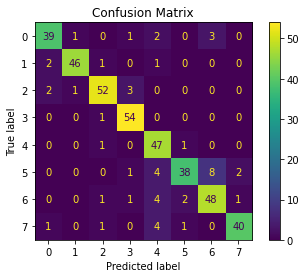

In [35]:
def multiclass_GNB():
    '''Report the confusion matrix;
       Calculate the accuracy, recall, precision and F-1 score;'''
    clf_gnb = GaussianNB()
    clf_gnb.fit(X_train_lsa, Y_multiclass_train)
    
    # Report Confusion Matrix
    disp = plot_confusion_matrix(clf_gnb, 
                          X_test_lsa,
                          Y_multiclass_test,
                          values_format='d',
                          display_labels= Y_multiclass_names)

    disp.ax_.set_title('Confusion Matrix')
    print('The confusion matrix is:\n', disp.confusion_matrix)

    # Calcute accuracy, recall, precision, F-1 score
    y_pred = clf_gnb.predict(X_test_lsa)
    print('The accuracy is:', accuracy_score(Y_multiclass_test,y_pred))
    print('The recall is:', recall_score(Y_multiclass_test,y_pred, average='weighted'))
    print('The percision is:', precision_score(Y_multiclass_test,y_pred, average='weighted'))
    print('The F-1 score is:', f1_score(Y_multiclass_test,y_pred, average='weighted'))

    # Plot ROC curve
    # plot_roc_curve(clf_gnb, X_test_lsa, Y_test) 
    # plt.title('Receiver Operating Characteristic')
multiclass_GNB()

The confusion matrix is:
 [[44  0  0  1  0  0  1  0]
 [ 1 49  0  0  0  0  0  0]
 [ 4  1 53  0  0  0  0  0]
 [ 1  0  0 54  0  0  0  0]
 [ 2  0  1  0 46  0  0  0]
 [ 2  0  0  1  2 44  2  2]
 [ 3  0  1  1  0  2 49  1]
 [ 3  0  1  0  2  1  0 40]]
The accuracy is: 0.9132530120481928
The recall is: 0.9132530120481928
The percision is: 0.9201468520597049
The F-1 score is: 0.9141085682591578
The confusion matrix is:
 [[44  0  0  1  0  0  1  0]
 [ 1 49  0  0  0  0  0  0]
 [ 4  1 53  0  0  0  0  0]
 [ 1  0  0 54  0  0  0  0]
 [ 2  0  1  0 46  0  0  0]
 [ 2  0  0  1  2 44  2  2]
 [ 3  0  1  1  0  2 49  1]
 [ 3  0  1  0  2  1  0 40]]
The accuracy is: 0.9132530120481928
The recall is: 0.9132530120481928
The percision is: 0.9201468520597049
The F-1 score is: 0.9141085682591578


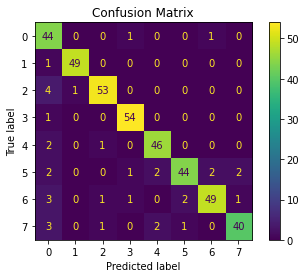

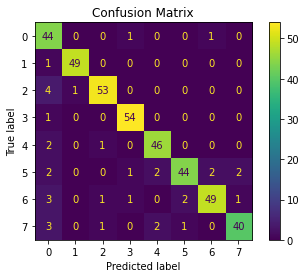

In [36]:
def multiclass_SVM(method='ovo', class_weight='balanced'):
    '''Report the confusion matrix;
       Calculate the accuracy, recall, precision and F-1 score;'''
    clf_svm = SVC(decision_function_shape=method, class_weight=class_weight)
    clf_svm.fit(X_train_lsa, Y_multiclass_train)
    
    # Report Confusion Matrix
    disp = plot_confusion_matrix(clf_svm, 
                          X_test_lsa,
                          Y_multiclass_test,
                          values_format='d',
                          display_labels= Y_multiclass_names)

    disp.ax_.set_title('Confusion Matrix')
    print('The confusion matrix is:\n', disp.confusion_matrix)

    # Calcute accuracy, recall, precision, F-1 score
    y_pred = clf_svm.predict(X_test_lsa)
    print('The accuracy is:', accuracy_score(Y_multiclass_test,y_pred))
    print('The recall is:', recall_score(Y_multiclass_test,y_pred, average='weighted'))
    print('The percision is:', precision_score(Y_multiclass_test,y_pred, average='weighted'))
    print('The F-1 score is:', f1_score(Y_multiclass_test,y_pred, average='weighted'))

    # Plot ROC curve
    # plot_roc_curve(clf_gnb, X_test_lsa, Y_test) 
    # plt.title('Receiver Operating Characteristic')
multiclass_SVM('ovo', class_weight='balanced')
multiclass_SVM('ovr', class_weight='balanced')

The confusion matrix is:
 [[ 43   0   0   1   0   2]
 [  0  49   0   0   0   1]
 [  3   1  53   0   0   1]
 [  1   0   0  54   0   0]
 [  0   0   1   0  45   3]
 [  0   0   2   2   2 151]]
The accuracy is: 0.9518072289156626
The recall is: 0.9518072289156626
The percision is: 0.951909455658362
The F-1 score is: 0.9517139956056743
The confusion matrix is:
 [[ 43   0   0   1   0   2]
 [  0  49   0   0   0   1]
 [  3   1  53   0   0   1]
 [  1   0   0  54   0   0]
 [  0   0   1   0  45   3]
 [  0   0   2   2   2 151]]
The accuracy is: 0.9518072289156626
The recall is: 0.9518072289156626
The percision is: 0.951909455658362
The F-1 score is: 0.9517139956056743


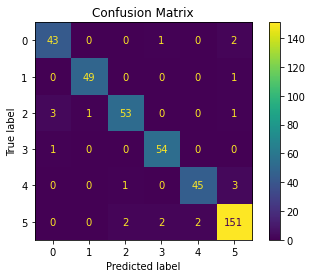

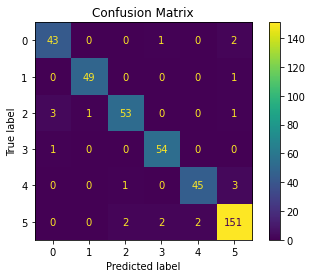

In [37]:
Y_multiclass_train = Y_multiclass_train.clip(0,5)
Y_multiclass_test = Y_multiclass_test.clip(0,5)
Y_multiclass_names = [0,1,2,3,4,5]

multiclass_SVM('ovo', None)
multiclass_SVM('ovr', None)


The confusion matrix is:
 [[ 45   0   0   1   0   0]
 [  1  49   0   0   0   0]
 [  4   1  53   0   0   0]
 [  1   0   0  54   0   0]
 [  2   0   1   0  46   0]
 [  7   0   2   2   4 142]]
The accuracy is: 0.9373493975903614
The recall is: 0.9373493975903614
The percision is: 0.9459713742186793
The F-1 score is: 0.9389909445191668
The confusion matrix is:
 [[ 45   0   0   1   0   0]
 [  1  49   0   0   0   0]
 [  4   1  53   0   0   0]
 [  1   0   0  54   0   0]
 [  2   0   1   0  46   0]
 [  7   0   2   2   4 142]]
The accuracy is: 0.9373493975903614
The recall is: 0.9373493975903614
The percision is: 0.9459713742186793
The F-1 score is: 0.9389909445191668


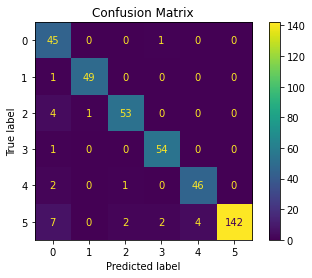

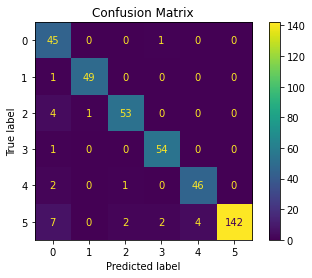

In [38]:
multiclass_SVM('ovo', class_weight='balanced')
multiclass_SVM('ovr', class_weight='balanced')

# Question 10: Word Embedding
(a): Since compared to the probabilities themselves, the ratio is better able to distinguish relevant words from irrelevant words and it is also better able to discriminate between the two relevant words. The paper gives us the following example: The probability of the word solid appearing in the context of ice and stream are 1.9 × 10−4 and 2.2 × 10−5 (both quite small) and the probability of the word gas appearing in the context of ice and stream are 6.6 × 10−5 and 7.8 × 10−4(quite small too). However, the ratios of co-occurrence probabilities are 8.9 and 8.5 × 10−2 respectively. Therefore, solid is more related to ice rather than stream and gas is more related to stream instead of ice. For the word water, the ratio is 1.36 (close to 1), indicating that water is about equally related to both ice and stream.

(b): I think GLoVE embeddings return the same vector for the word **running ** in both sentences since one word would only have one embedding even though it may have multiple meanings.

(c): The value of ||GLoVE["queen"] - GLoVE["king"] - GLoVE["wife"] + GLoVE["husband"]||2 is close to one since it is equal to ||GLoVE["queen"] - GLoVE["king"] - (GLoVE["wife"] - GLoVE["husband"])||2, which return the difference of the difference between queen and king and that of wife and husband. Since both relations is close to the relation of conjugate, the difference is close to zero. Also, the values of ||GLoVE["queen"] - GLoVE["king"]||2 and ||GLoVE["wife"] - GLoVE["husband"]||2 are approximately equal due to the reason above.

(d): I would rather stem instead of lemmatizing the word since it would generate more accuracy and will not generate any meaninglessness.

In [39]:
embeddings_dict = {}
dimension_of_glove = 300
with open("glove.6B.300d.txt", 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector


# Question 11:


## (a):

In [40]:
import nltk
import re
from pandas.core.frame import DataFrame

np.random.seed(42)
random.seed(42)
train, test = train_test_split(df[['full_text', 'summary', 'keywords', 'root_label']], test_size=0.2)

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
nltk.download('wordnet')

def feature(keywords):
  emb_list = []
  keywords = keywords.split(' ')
  for word in keywords:
    if word in embeddings_dict:
      vector = embeddings_dict[word] 
      emb_list.append(vector)
  emb_list = np.array(emb_list)
  emb_list = np.sum(emb_list, axis=0)
  emb_list = emb_list / np.linalg.norm(emb_list)
  return emb_list.tolist()

def filter(words):
  words = re.findall('\'(.+?)\'', words)
  ret_list = []
  for i in range(len(words)):
    words[i] = words[i].lower()
    words[i] = ps.stem(words[i])  
    if (words[i].isalpha()):
      ret_list.append(words[i])
  return feature(' '.join(ret_list))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
X_train = DataFrame([filter(train.iloc[i]['keywords']) for i in range(train.shape[0])])
X_test = DataFrame([filter(test.iloc[i]['keywords']) for i in range(test.shape[0])])
y_train = DataFrame([(1 if train.iloc[i]['root_label']=='climate' else 0) for i in range(train.shape[0])])
y_test = DataFrame([(1 if test.iloc[i]['root_label']=='climate' else 0) for i in range(test.shape[0])])


##(b):

In [43]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model=linear_model.LogisticRegression(penalty='l2',C=3,solver='liblinear',max_iter=1000000)
x=np.array(X_train)
y=np.array(y_train).ravel()
model.fit(x,y)
scores=cross_val_score(model,x,y,scoring='accuracy') 


print('The accuracy of this model with default 5-fold cross validation is '+str(np.mean(scores)*100)+'%.')
print("The tranning accuracy of this model is "+str(accuracy_score(y_train,model.predict(X_train))*100)+'%.')
print("The testing accuracy of this model is "+str(accuracy_score(y_test,model.predict(X_test))*100)+'%.')

The accuracy of this model with default 5-fold cross validation is 93.05882138827212%.
The tranning accuracy of this model is 96.13759806879904%.
The testing accuracy of this model is 94.6987951807229%.


# Question 12

In [44]:

test_accuracy_list = []

embeddings_dict = {}
dimension_of_glove = 50
with open("glove.6B.50d.txt", 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector

X_train = DataFrame([filter(train.iloc[i]['keywords']) for i in range(train.shape[0])])
X_test = DataFrame([filter(test.iloc[i]['keywords']) for i in range(test.shape[0])])
y_train = DataFrame([(1 if train.iloc[i]['root_label']=='climate' else 0) for i in range(train.shape[0])])
y_test = DataFrame([(1 if test.iloc[i]['root_label']=='climate' else 0) for i in range(test.shape[0])])
model=linear_model.LogisticRegression(penalty='l2',C=3,solver='liblinear',max_iter=1000000)
x=np.array(X_train)
y=np.array(y_train).ravel()
model.fit(x,y)
test_acc = accuracy_score(y_test,model.predict(X_test))
test_accuracy_list.append(test_acc)

embeddings_dict = {}
dimension_of_glove = 100
with open("glove.6B.100d.txt", 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector

X_train = DataFrame([filter(train.iloc[i]['keywords']) for i in range(train.shape[0])])
X_test = DataFrame([filter(test.iloc[i]['keywords']) for i in range(test.shape[0])])
y_train = DataFrame([(1 if train.iloc[i]['root_label']=='climate' else 0) for i in range(train.shape[0])])
y_test = DataFrame([(1 if test.iloc[i]['root_label']=='climate' else 0) for i in range(test.shape[0])])
model=linear_model.LogisticRegression(penalty='l2',C=3,solver='liblinear',max_iter=1000000)
x=np.array(X_train)
y=np.array(y_train).ravel()
model.fit(x,y)
test_acc = accuracy_score(y_test,model.predict(X_test))
test_accuracy_list.append(test_acc)

embeddings_dict = {}
dimension_of_glove = 200
with open("glove.6B.200d.txt", 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector

X_train = DataFrame([filter(train.iloc[i]['keywords']) for i in range(train.shape[0])])
X_test = DataFrame([filter(test.iloc[i]['keywords']) for i in range(test.shape[0])])
y_train = DataFrame([(1 if train.iloc[i]['root_label']=='climate' else 0) for i in range(train.shape[0])])
y_test = DataFrame([(1 if test.iloc[i]['root_label']=='climate' else 0) for i in range(test.shape[0])])
model=linear_model.LogisticRegression(penalty='l2',C=3,solver='liblinear',max_iter=1000000)
x=np.array(X_train)
y=np.array(y_train).ravel()
model.fit(x,y)
test_acc = accuracy_score(y_test,model.predict(X_test))
test_accuracy_list.append(test_acc)

embeddings_dict = {}
dimension_of_glove = 300
with open("glove.6B.300d.txt", 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector

X_train = DataFrame([filter(train.iloc[i]['keywords']) for i in range(train.shape[0])])
X_test = DataFrame([filter(test.iloc[i]['keywords']) for i in range(test.shape[0])])
y_train = DataFrame([(1 if train.iloc[i]['root_label']=='climate' else 0) for i in range(train.shape[0])])
y_test = DataFrame([(1 if test.iloc[i]['root_label']=='climate' else 0) for i in range(test.shape[0])])
model=linear_model.LogisticRegression(penalty='l2',C=3,solver='liblinear',max_iter=1000000)
x=np.array(X_train)
y=np.array(y_train).ravel()
model.fit(x,y)
test_acc = accuracy_score(y_test,model.predict(X_test))
test_accuracy_list.append(test_acc)

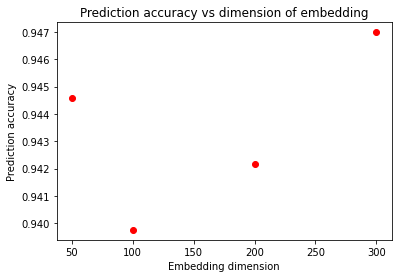

In [45]:
plt.scatter([50,100,200,300], test_accuracy_list,color='r')
plt.title('Prediction accuracy vs dimension of embedding')
plt.xlabel('Embedding dimension')
plt.ylabel('Prediction accuracy')
plt.show()

There is no observed trend since all the prediction accuracies are similar. I think this trend is expected since 50-dimension is more than enough to represent the information. As a result, 100 200 and 300 dimensions would not increase the accuracy further more.

In [47]:
!pip uninstall umap
!pip install umap-learn
import umap.umap_ as umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(X_test)

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 7.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=34739e96edcc00b13d9bd8058c4ca19a8ea63e76f9d9bab0a00ee673d951e7df
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=72c9dd50ca80d755475d5aab190b294449aa43b7168ff347aea8e1be38049e18
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


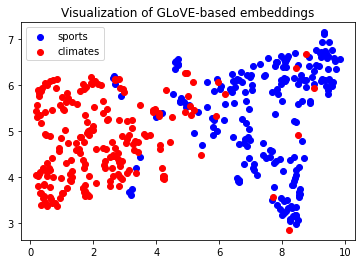

In [48]:
x1 = []
y1 = []
x0 = []
y0 = []

for i in range(len(X_test)):
  if y_test.iloc[i][0] == 0:
    x0.append(embedding[i,0])
    y0.append(embedding[i,1])
  else:
    x1.append(embedding[i,0])
    y1.append(embedding[i,1])

plt.scatter(x0,y0,c='b',label='sports')
plt.scatter(x1,y1, c='r', label='climates')
plt.title('Visualization of GLoVE-based embeddings')
plt.legend()
plt.show()

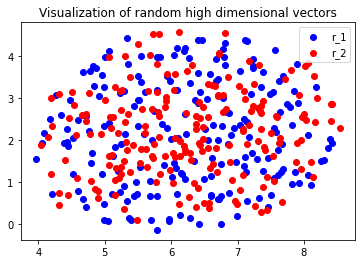

In [53]:
r = np.random.random((400, 300))
r = (r/ np.linalg.norm(r)).tolist()
r_dots = reducer.fit_transform(DataFrame(r))
plt.scatter(r_dots[:200, 0],r_dots[:200, 1], c='b', label='r_1')
plt.scatter(r_dots[200:, 0],r_dots[200:, 1], c='r', label='r_2')
plt.title('Visualization of random high dimensional vectors')
plt.legend()
plt.show()

#Question 13:


We can clearly see that in the first visualization we have a clear cluster but not the second one.